In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D

cardata=pd.read_csv("fuel_economy.csv") 
cardata=cardata.replace(regex=["cca",r"\mm.",",","~"," ",r"\(..",r"\(...",r"\)", "NaN"],value="")

In [67]:
cardata.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [68]:
data=pd.get_dummies(cardata, columns=["manufacturer","model","year","cyl", "trans", "drv", "fl", "class"])

In [69]:
data.head()

,displ,cty,hwy,manufacturer_audi,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,...,fl_e,fl_p,fl_r,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,1.8,18,29,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1.8,21,29,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2.0,20,31,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,2.0,21,30,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,2.8,16,26,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [70]:
N=len(data.cty)
def norm(a):
    return a.dot(a)
X=data.filter(["cty","hwy"])

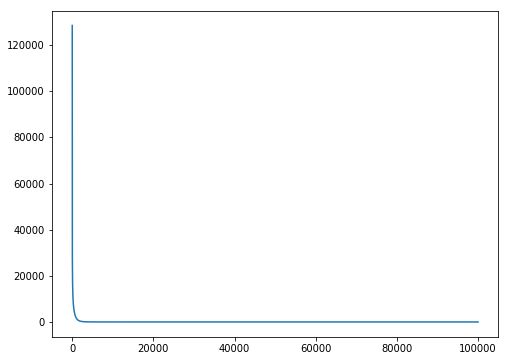

In [78]:
PHI=np.ones((N,N))
for i in range(N):
    for j in range(N):
        PHI[i,j]=np.exp(-norm(X.iloc[j,:]-X.iloc[i,:]))
    pass



w = np.random.randn(N)

J = []
eta = 1e-3
epochs = 100000

for t in range(epochs):
    y_hat = PHI.dot(w)
    J.append(norm(y-y_hat))
    w -= eta*PHI.T.dot(y_hat - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [81]:
R2=1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)
print("R-squared: {}".format (R2))

R-squared: 0.9999999999999971
